### Import necessary libraries for the experiment

In [1]:
import os
current_directory = os.getcwd()
print(current_directory)

/Users/macbookpro/hdd/MSc/Dissertation/multilabeltextclassification


In [2]:
import numpy
numpy.version.version

'1.22.0'

In [3]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.python.keras.models import Model, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation, SimpleRNN
from tensorflow.keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate


from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers import SGD

# For custom metrics
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn as sns
from IPython.display import Image

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
import string
import gensim

sns.set_style("whitegrid")
np.random.seed(0)

# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

2023-04-01 05:53:17.044359: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.

Double check with Python 3


In [4]:
#df1 = pd.read_csv('/Users/macbookpro/hdd/MSc/Dissertation/multilabeltextclassification/githubissuedata2M.csv')
df = pd.read_csv('/Users/macbookpro/hdd/MSc/Dissertation/multilabeltextclassification/githubissuedata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226163 entries, 0 to 226162
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   title             225152 non-null  object
 1   body              225866 non-null  object
 2   task              226163 non-null  int64 
 3   bug               226163 non-null  int64 
 4   documentation     226163 non-null  int64 
 5   duplicate         226163 non-null  int64 
 6   enhancement       226163 non-null  int64 
 7   good_first_issue  226163 non-null  int64 
 8   help_wanted       226163 non-null  int64 
 9   invalid           226163 non-null  int64 
 10  question          226163 non-null  int64 
 11  wontfix           226163 non-null  int64 
 12  gitalk            226163 non-null  int64 
 13  priority_medium   226163 non-null  int64 
 14  priority_high     226163 non-null  int64 
 15  feature_request   226163 non-null  int64 
 16  feature           226163 non-null  int

In [5]:
df.head(10)

title  \
0  My Account Paid  laptop 1440 resolution  Updat...   
1  How to fix sleepimpl warning when ECS credenti...   
2                Slider doesnt work on touch devices   
3                                     add new labels   
4                  No lib sub folder in Boost folder   
5                          Add license notice to CLI   
6  Should show Powershell or AzureCLI code necess...   
7  tidboperator could not work with kubernetes 1.23    
8                                         Match Live   
9  AngularBug Make current location widget more g...   

                                                body  task  bug  \
0  Case:Distance between Registered email address...     0    1   
1   Prerequisites X Ive searched for previous sim...     0    1   
2   DescriptionSlider should work dragging in tou...     0    1   
3   DescriptionAdd ui and logic to permanently ad...     0    0   
4  Hi I am following thishttps://www.mlpack.org/d...     0    0   
5  The CLI is missing the license notice. Theres ...     0    0   
6  There is example output from Powershell and Az...     0    0   
7   Bug ReportWhat version of Kubernetes are you ...     0    1   
8   x Implement game logic x Calculate results ba...     0    0   
9  If youve never submitted an issue to the SORMA...     0    1   

   documentation  duplicate  enhancement  good_first_issue  help_wanted  \
0              0          0            0                 0            0   
1              0          0            0                 0            0   
2              0          0            0                 0            0   
3              0          0            1                 0            0   
4              0          0            0                 0            1   
5              0          0            0                 0            0   
6              0          0            1                 0            0   
7              0          0            0                 0            0   
8              0          0            1                 0            0   
9              0          0            0                 0            0   

   invalid  question  wontfix  gitalk  priority_medium  priority_high  \
0        1         0        0       0                0              0   
1        0         0        0       0                0              0   
2        0         0        0       0                0              0   
3        0         0        0       0                0              0   
4        0         1        0       0                0              0   
5        0         0        0       0                0              0   
6        0         0        0       0                0              0   
7        0         0        0       0                0              0   
8        0         0        0       0                0              0   
9        0         0        0       0                0              0   

   feature_request  feature  
0                0        0  
1                0        0  
2                0        0  
3                0        0  
4                0        0  
5                0        1  
6                0        0  
7                0        0  
8                0        0  
9                0        0

In [6]:
# check missing values in the dataset
print('The dataset has', df.isna().sum().sum(), 'missing values in test data.')
# check any duplicate records in the dataset
print('The dataset has', df.duplicated().sum(), 'duplicates in train data.')

The dataset has 1308 missing values in test data.
The dataset has 46411 duplicates in train data.


In [7]:
# remove missing values in the dataset
df.dropna(inplace= True)
# remove all duplicate records in the dataset
df.drop_duplicates(inplace= True)

In [8]:
# check missing values in the dataset
print('The dataset has', df.isna().sum().sum(), 'missing values in test data.')
# check any duplicate records in the dataset
print('The dataset has', df.duplicated().sum(), 'duplicates in train data.')

The dataset has 0 missing values in test data.
The dataset has 0 duplicates in train data.


In [9]:
# spliting dataset to train and test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=25)

### Number of records in the train and test data

In [10]:
print("Train data shape", train_df.shape)
print("Test data shape", test_df.shape)

Train data shape (143145, 17)
Test data shape (35787, 17)


### CORRELATION BETWEEN DATA LABELS

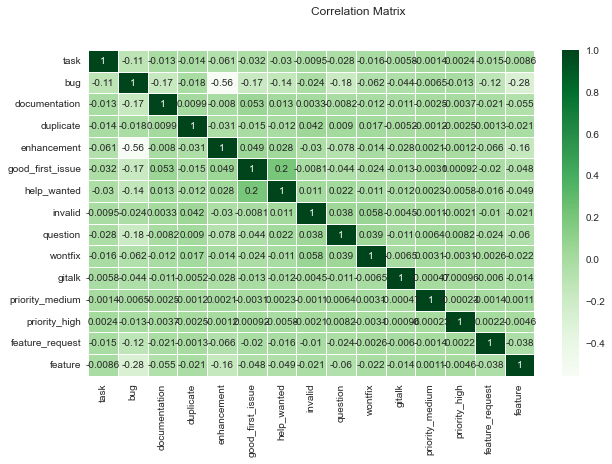

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Correlation Matrix')
sns.heatmap(train_df.corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax);

The correlation figure below shows that Toxic" comments are clearly correlated with both "obscene" and "insult" comments. Interestingly, "toxic" and "severe_toxic" are only weakly correlated. While we can also observe that, "Obscene" comments and "insult" comments are also highly correlated, which makes perfect sense.

### DATA PREPROCESSING
Deep Neural Networks input layers make use of input variables to feed the network for training the model. But in this task (experiment), we're dealing with words text. How do we represent these words in order to feed our model?

In our experiment, we used densed representation of those text (comments) and their semanticity together. The advantage of using this approach is the best way for fitting neural networks onto a text data (as in our case), as well as less memory usage compared to other sparse representation approaches.


#### Word Embedding
Two ways to feed embeddings to neural networks:
   * Using your own word embeddings by training
   * Using pre-trained embedding (e.g Word2vec, lad2vec, Glove etc)
   


In [12]:
#Convert text to vectors using keras preprocessing library tools

X_train = train_df["body"].values
X_test  = test_df["body"].values

y_train = train_df[["task","bug","documentation","duplicate","enhancement","good_first_issue","help_wanted","invalid","question","wontfix","gitalk","priority_medium","priority_high","feature_request","feature"]].values
y_test  = test_df[["task","bug","documentation","duplicate","enhancement","good_first_issue","help_wanted","invalid","question","wontfix","gitalk","priority_medium","priority_high","feature_request","feature"]].values






For the first embedding, we used keras preprocessing (Text Preprocessing) libraries. This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf

In [13]:
num_words = 20000 #Max. workds to use per toxic comment
max_features = 200000 #Max. number of unique words in embeddinbg vector
max_len = 500 #Max. number of words per issue bodies to be use
embedding_dims = 128 #embedding vector output dimension 
num_epochs = 15 # (before 5)number of epochs (number of times that the model is exposed to the training dataset)
val_split = 0.1
batch_size2 = 256 #(before 32)The **batch size** is the number of training examples in one forward/backward pass.
                  # In general, larger batch sizes result in faster progress in training, but don't always converge as quickly. 
                  #Smaller batch sizes train slower, but can converge faster. And the higher the batch size, the more memory space you’ll need.

In [14]:
#Issue body Tokenization
tokenizer = tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(list(X_train))

#Convert tokenized issue body text to sequnces
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
 
# padding the sequences
X_train = pad_sequences(X_train, max_len)
X_test  = pad_sequences(X_test,  max_len)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape: (143145, 500)
X_test shape:  (35787, 500)


##We use cross validation to split arrays or matrices of train data into random train and validation subsets

In [15]:
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, train_size =0.9, random_state=233)

## METHODS ( CNN, RNN, LSTM, all  using Glove)

#### We used early callback functionality that allows you to specify the performance measure to monitor, the trigger, and once triggered. It will stop the training process.

In [16]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=4)

#### Using Precision, Recall, F1-Measure, AUC, mean etc evaluaiton metrics to evaluate our model

In [17]:
#Writing functions for Precision, Recall, F1-Measure, AUC, mean etc evaluaiton metrics to evaluate the model

#Import necessary libraries
4# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


def precision(y_true, y_pred):
    #Calculating precision, a metric for multi-label classification of how many selected items are relevant.
    
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    #Calculating recall, a metric for multi-label classification of how many relevant items are selected.
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

  #Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def fbeta_score(y_true, y_pred, beta=1):
    '''Calculates the F score, the weighted harmonic mean of precision and recall.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    '''
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
        
    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0.0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def auroc(y_true, y_pred):
    auc = tf.keras.metrics.AUC(y_true, y_pred)[1]
    #auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

def fmeasure(y_true, y_pred):
    #Calculates the f-measure, the harmonic mean of precision and recall.
    return fbeta_score(y_true, y_pred, beta=1)


fscore = f1score = fmeasure

In [18]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
issueBodies_lines = list()
lines = train_df['body'].values.tolist()

for line in lines:
    tokens = word_tokenize(line)
    
    #convert to lower case
    tokens = [w.lower() for w in tokens]
    
    #remove punctuation from each word
    table =  str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    #remove remaining tpkens gthat are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    #filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    issueBodies_lines.append(words)


len(issueBodies_lines)

143145

In [22]:
#train word2vec mode
word2VecModel = gensim.models.Word2Vec(sentences=issueBodies_lines, vector_size= embedding_dims, window=5, workers=4, min_count=1)
#vocab size
wors = list(word2VecModel.wv.index_to_key)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 53


In [23]:
#Save the Word2Vec Corpus locally¶
filename = 'issue_embedding_word2vec.txt'
word2VecModel.wv.save_word2vec_format(filename, binary=False)

In [24]:
#Use the Pre-Trained Embedding (Word2Vec) in our models (CNN, and RNN)
word2Vec_embeddings_index = {}
word2vec_file = open(os.path.join('', 'issue_embedding_word2vec.txt'), encoding = "utf-8")

for line in word2vec_file:
    values = line.split()
    word = values[0]
    coefficient = np.asarray(values[1:])
    word2Vec_embeddings_index[word] = coefficient
word2vec_file.close()

## A) "Word2Vec" as a pre-trained Embedding

#### Prepare the pre-trained embedding layer

In [25]:
#vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(issueBodies_lines)
sequences = tokenizer_obj.texts_to_sequences(issueBodies_lines)

#pad sequences
word_index = tokenizer_obj.word_index
print('Found %s uniquue tokens.' % len(word_index))

issueBodies_pad = pad_sequences(sequences, maxlen=max_len)
issue_tag = train_df[["task","bug","documentation","duplicate","enhancement","good_first_issue","help_wanted","invalid","question","wontfix","gitalk","priority_medium","priority_high","feature_request","feature"]].values
print('Shape of issue bodies tensor', issueBodies_pad.shape)
print('Shape of issue bodies tensor', issue_tag.shape)

Found 792007 uniquue tokens.
Shape of issue bodies tensor (143145, 500)
Shape of issue bodies tensor (143145, 15)


#### Prepare the embedding matrix vectors in order to feed/pass the neural network

In [26]:
num_words = len(word_index)+1
word2Vec_embedding_matrix = np.zeros((num_words, embedding_dims))

for word, i  in word_index.items():
    if i > num_words:
        continue
    word2Vec_embedding_vector = word2Vec_embeddings_index.get(word)
    if word2Vec_embedding_vector is not None:
        #words not found in embedding index will be all-zeros.
        word2Vec_embedding_matrix[i] = word2Vec_embedding_vector

print(num_words)
print(word2Vec_embedding_matrix.shape[0])
print(word2Vec_embedding_matrix.shape[1])

792008
792008
128


In [27]:
#1 Convolutional Neural Network (CNN) with Word2Vec
CNN_Word2Vec_model = Sequential([
    Embedding(input_dim =word2Vec_embedding_matrix.shape[0], input_length=max_len, output_dim=word2Vec_embedding_matrix.shape[1],weights=[word2Vec_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    # ... 100 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
    Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    #It will be added after the activation function between a convolutional and a max-pooling layer.
    BatchNormalization(),
    GlobalMaxPool1D(),
    Dropout(0.5),
    Dense(50, activation = 'relu'),
    Dense(15, activation = 'sigmoid')
])

In [28]:
CNN_Word2Vec_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, recall])

### Visualize the Orchestrated CNN-Glove Model Architecture

In [29]:
CNN_Word2Vec_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          101377024 
                                                                 
 spatial_dropout1d (SpatialD  (None, 500, 128)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 500, 100)          51300     
                                                                 
 batch_normalization (BatchN  (None, 500, 100)         400       
 ormalization)                                                   
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                        

In [30]:
#plot the CNN_GLove model architecture

#plot_model(CNN_Glove_model, to_file='CNN_Glove_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='CNN_Glove_model_plot.png')

In [31]:
CNN_Word2Vec_model_fit = CNN_Word2Vec_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val))

Epoch 1/15
504/504 [==============================] - 196s 384ms/step - loss: 0.2096 - accuracy: 0.5020 - mean_pred: 0.0856 - fmeasure: 0.3431 - precision: 0.6042 - recall: 0.2472 - val_loss: 0.1847 - val_accuracy: 0.5776 - val_mean_pred: 0.0862 - val_fmeasure: 0.3810 - val_precision: 0.8247 - val_recall: 0.2481
Epoch 2/15
504/504 [==============================] - 193s 382ms/step - loss: 0.1830 - accuracy: 0.5578 - mean_pred: 0.0820 - fmeasure: 0.4337 - precision: 0.7024 - recall: 0.3147 - val_loss: 0.1783 - val_accuracy: 0.5922 - val_mean_pred: 0.0889 - val_fmeasure: 0.4846 - val_precision: 0.7308 - val_recall: 0.3629
Epoch 3/15
504/504 [==============================] - 193s 382ms/step - loss: 0.1785 - accuracy: 0.5746 - mean_pred: 0.0814 - fmeasure: 0.4673 - precision: 0.7019 - recall: 0.3510 - val_loss: 0.1723 - val_accuracy: 0.6061 - val_mean_pred: 0.0854 - val_fmeasure: 0.5081 - val_precision: 0.7258 - val_recall: 0.3912
Epoch 4/15
504/504 [==============================] - 192s

### Plot Training & Validation Accuracy with the Loss values of the CNN-Glove Model

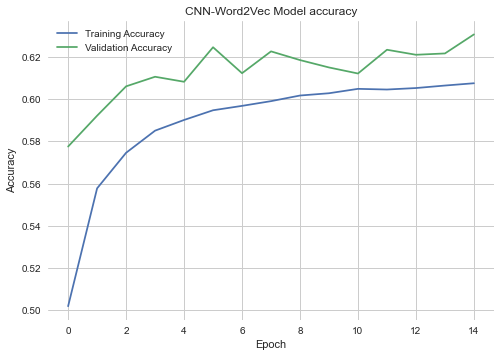

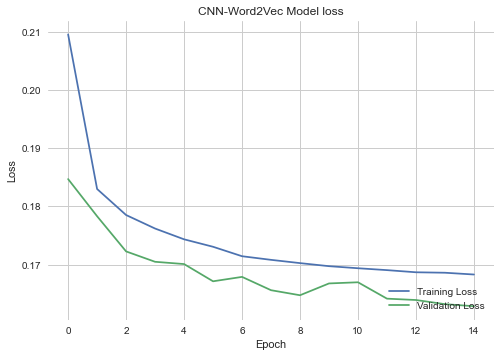

In [32]:
# Plot training & validation accuracy values
plt.plot(CNN_Word2Vec_model_fit.history['accuracy'])
plt.plot(CNN_Word2Vec_model_fit.history['val_accuracy'])
plt.title('CNN-Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(CNN_Word2Vec_model_fit.history['loss'])
plt.plot(CNN_Word2Vec_model_fit.history['val_loss'])
plt.title('CNN-Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [33]:
#2 Recurrent Neural Network (RNN) with Word2Vec
RNN_Word2Vec_model = Sequential([
    Embedding(input_dim =word2Vec_embedding_matrix.shape[0], input_length=max_len, output_dim=word2Vec_embedding_matrix.shape[1],weights=[word2Vec_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Fully-connected RNN where the output is to be fed back to input.
    SimpleRNN(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(15, activation = 'sigmoid')
])

In [34]:
#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
RNN_Word2Vec_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, recall])

### Visualize the Orchestrated RNN-Glove MODEL Architecture

In [35]:
RNN_Word2Vec_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          101377024 
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 500, 128)         0         
 lDropout1D)                                                     
                                                                 
 simple_rnn (SimpleRNN)      (None, 500, 25)           3850      
                                                                 
 batch_normalization_1 (Batc  (None, 500, 25)          100       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 500, 25)           0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 25)              

In [36]:
RNN_Word2Vec_model_fit = RNN_Word2Vec_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val))

Epoch 1/15
504/504 [==============================] - 120s 234ms/step - loss: 0.2046 - accuracy: 0.4906 - mean_pred: 0.0831 - fmeasure: 0.2680 - precision: 0.4693 - recall: 0.2240 - val_loss: 0.2363 - val_accuracy: 0.4451 - val_mean_pred: 0.1487 - val_fmeasure: 5.6773e-04 - val_precision: 0.0804 - val_recall: 2.8496e-04
Epoch 2/15
504/504 [==============================] - 119s 237ms/step - loss: 0.1942 - accuracy: 0.4985 - mean_pred: 0.0810 - fmeasure: 0.3335 - precision: 0.6093 - recall: 0.2342 - val_loss: 0.2281 - val_accuracy: 0.5117 - val_mean_pred: 0.1447 - val_fmeasure: 0.3412 - val_precision: 0.7230 - val_recall: 0.2236
Epoch 3/15
504/504 [==============================] - 118s 233ms/step - loss: 0.1922 - accuracy: 0.4980 - mean_pred: 0.0809 - fmeasure: 0.3163 - precision: 0.6711 - recall: 0.2101 - val_loss: 0.2157 - val_accuracy: 0.5335 - val_mean_pred: 0.1303 - val_fmeasure: 0.3526 - val_precision: 0.7237 - val_recall: 0.2335
Epoch 4/15
504/504 [==============================

### Plot Training & Validation Accuracy with the Loss values of the RNN-Glove Model

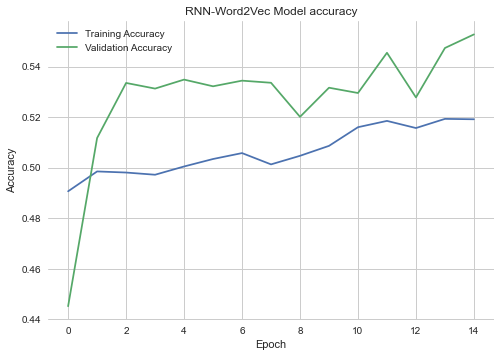

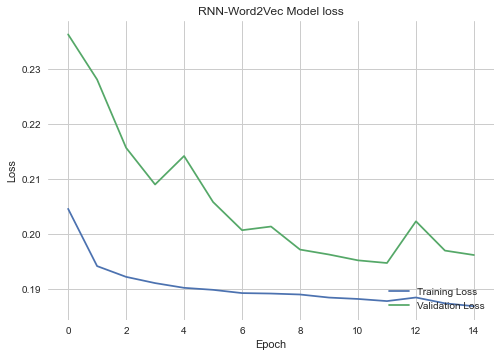

In [37]:
# Plot training & validation accuracy values
plt.plot(RNN_Word2Vec_model_fit.history['accuracy'])
plt.plot(RNN_Word2Vec_model_fit.history['val_accuracy'])
plt.title('RNN-Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(RNN_Word2Vec_model_fit.history['loss'])
plt.plot(RNN_Word2Vec_model_fit.history['val_loss'])
plt.title('RNN-Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 3) LSTM with Glove

In [38]:
#3 LSTM with Word2Vec

LSTM_Word2Vec_model = Sequential([
    Embedding(input_dim =word2Vec_embedding_matrix.shape[0], input_length=max_len, output_dim=word2Vec_embedding_matrix.shape[1],weights=[word2Vec_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    LSTM(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(15, activation = 'sigmoid')
])

2023-04-01 14:20:17.769342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-01 14:20:17.772055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-01 14:20:17.774951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [39]:
LSTM_Word2Vec_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, recall])

In [40]:
LSTM_Word2Vec_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 128)          101377024 
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 500, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm (LSTM)                 (None, 500, 25)           15400     
                                                                 
 batch_normalization_2 (Batc  (None, 500, 25)          100       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 500, 25)           0         
                                                                 
 global_max_pooling1d_2 (Glo  (None, 25)              

In [41]:
LSTM_Word2Vec_model_fit = LSTM_Word2Vec_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val))


Epoch 1/15


2023-04-01 14:20:18.235328: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-01 14:20:18.237585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-01 14:20:18.239274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

504/504 [==============================] - ETA: 0s - loss: 0.1988 - accuracy: 0.5127 - mean_pred: 0.0825 - fmeasure: 0.3637 - precision: 0.6418 - recall: 0.2602

2023-04-01 14:23:24.483383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-01 14:23:24.485861: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-01 14:23:24.487887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

504/504 [==============================] - 197s 383ms/step - loss: 0.1988 - accuracy: 0.5127 - mean_pred: 0.0825 - fmeasure: 0.3637 - precision: 0.6418 - recall: 0.2602 - val_loss: 0.2359 - val_accuracy: 0.5587 - val_mean_pred: 0.1677 - val_fmeasure: 0.4506 - val_precision: 0.6916 - val_recall: 0.3345
Epoch 2/15
504/504 [==============================] - 196s 388ms/step - loss: 0.1826 - accuracy: 0.5480 - mean_pred: 0.0811 - fmeasure: 0.4234 - precision: 0.6925 - recall: 0.3064 - val_loss: 0.2152 - val_accuracy: 0.5762 - val_mean_pred: 0.1449 - val_fmeasure: 0.4236 - val_precision: 0.7584 - val_recall: 0.2943
Epoch 3/15
504/504 [==============================] - 205s 407ms/step - loss: 0.1796 - accuracy: 0.5640 - mean_pred: 0.0810 - fmeasure: 0.4478 - precision: 0.6935 - recall: 0.3316 - val_loss: 0.2030 - val_accuracy: 0.5909 - val_mean_pred: 0.1322 - val_fmeasure: 0.4678 - val_precision: 0.7328 - val_recall: 0.3439
Epoch 4/15
504/504 [==============================] - 208s 412ms/step

### Plot Training & Validation Accuracy with the Loss values of the LSTM-Glove Model



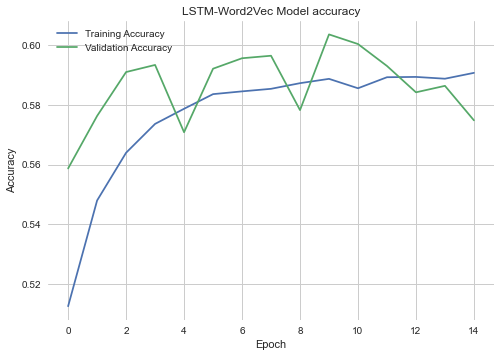

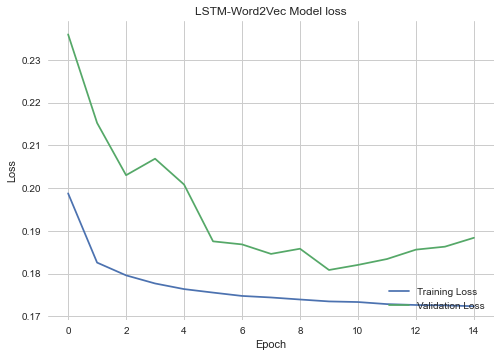

In [42]:
### Plot Training & Validation Accuracy with the Loss values of the LSTM-Word2Vec Model# Plot training & validation accuracy values
plt.plot(LSTM_Word2Vec_model_fit.history['accuracy'])
plt.plot(LSTM_Word2Vec_model_fit.history['val_accuracy'])
plt.title('LSTM-Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(LSTM_Word2Vec_model_fit.history['loss'])
plt.plot(LSTM_Word2Vec_model_fit.history['val_loss'])
plt.title('LSTM-Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 4) Bidirecitional LSTM with Glove

In [43]:
#4 Bidirecitional LSTM with Word2Vec
Bil_LSTM_Word2Vec_model = Sequential([
    Embedding(input_dim =word2Vec_embedding_matrix.shape[0], input_length=max_len, output_dim=word2Vec_embedding_matrix.shape[1],weights=[word2Vec_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    Bidirectional(LSTM(25, return_sequences=True)),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(15, activation = 'sigmoid')
])

2023-04-01 15:11:07.877816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-01 15:11:07.879878: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-01 15:11:07.881476: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [44]:
Bil_LSTM_Word2Vec_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, recall])


### Visualize the Orchestrated Bidirectional LSTM-Glove Model Architecture

In [45]:
Bil_LSTM_Word2Vec_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 128)          101377024 
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 500, 128)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 500, 50)          30800     
 l)                                                              
                                                                 
 batch_normalization_3 (Batc  (None, 500, 50)          200       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 500, 50)           0         
                                                      

In [46]:
Bil_LSTM_Word2Vec_model_fit = Bil_LSTM_Word2Vec_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val))


Epoch 1/15


2023-04-01 15:11:16.934802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-01 15:11:16.938003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-01 15:11:16.939929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

504/504 [==============================] - ETA: 0s - loss: 0.1938 - accuracy: 0.5412 - mean_pred: 0.0823 - fmeasure: 0.4170 - precision: 0.6595 - recall: 0.3099

2023-04-01 15:16:38.952156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-01 15:16:38.953928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-01 15:16:38.957359: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

504/504 [==============================] - 348s 663ms/step - loss: 0.1938 - accuracy: 0.5412 - mean_pred: 0.0823 - fmeasure: 0.4170 - precision: 0.6595 - recall: 0.3099 - val_loss: 0.2222 - val_accuracy: 0.5969 - val_mean_pred: 0.1577 - val_fmeasure: 0.4971 - val_precision: 0.7101 - val_recall: 0.3828
Epoch 2/15
504/504 [==============================] - 337s 669ms/step - loss: 0.1768 - accuracy: 0.5827 - mean_pred: 0.0811 - fmeasure: 0.4760 - precision: 0.7053 - recall: 0.3604 - val_loss: 0.2070 - val_accuracy: 0.6003 - val_mean_pred: 0.1402 - val_fmeasure: 0.4766 - val_precision: 0.7386 - val_recall: 0.3522
Epoch 3/15
504/504 [==============================] - 346s 687ms/step - loss: 0.1739 - accuracy: 0.5924 - mean_pred: 0.0810 - fmeasure: 0.4923 - precision: 0.7082 - recall: 0.3782 - val_loss: 0.2052 - val_accuracy: 0.6049 - val_mean_pred: 0.1395 - val_fmeasure: 0.5077 - val_precision: 0.7227 - val_recall: 0.3918
Epoch 4/15
504/504 [==============================] - 356s 705ms/step

### Plot Training & Validation Accuracy with the Loss values of the Bidirectional LSTM-Glove Model


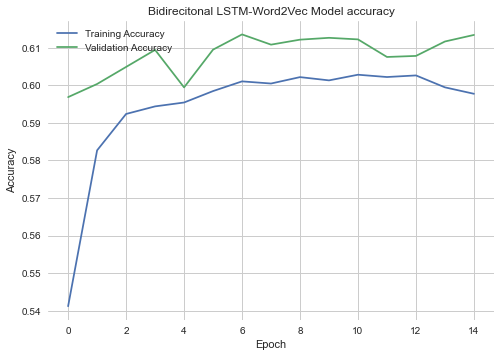

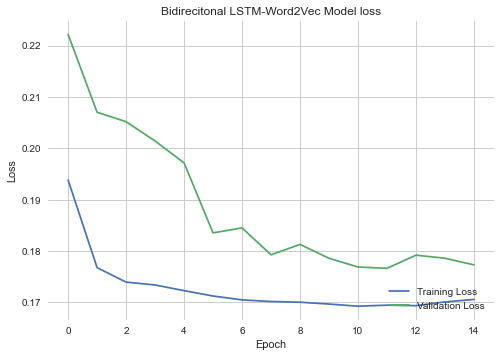

In [47]:
# Plot training & validation accuracy values
plt.plot(Bil_LSTM_Word2Vec_model_fit.history['accuracy'])
plt.plot(Bil_LSTM_Word2Vec_model_fit.history['val_accuracy'])
plt.title('Bidirecitonal LSTM-Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_LSTM_Word2Vec_model_fit.history['loss'])
plt.plot(Bil_LSTM_Word2Vec_model_fit.history['val_loss'])
plt.title('Bidirecitonal LSTM-Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [52]:
#5 Gated Recurrent (GRU) with Word2Vec
sequence_input = Input(shape=(max_len, ))
model = Embedding(input_dim =word2Vec_embedding_matrix.shape[0], input_length=max_len, output_dim=word2Vec_embedding_matrix.shape[1],weights=[word2Vec_embedding_matrix], trainable=False)(sequence_input)
model = SpatialDropout1D(0.2)(model)
model = GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1)(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool]) 
preds = Dense(15, activation="sigmoid")(model)
GRU_Word2Vec_model = Model(sequence_input, preds)

In [53]:
GRU_Word2Vec_model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=['accuracy', mean_pred, fmeasure, precision, recall])

### Visualize the Orchestrated GRU+Glove MODEL Architecture

In [54]:
GRU_Word2Vec_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 101,502,671
Trainable params: 125,647
Non-trainable params: 101,377,024
__________________________________________________________________________________________________


In [55]:
GRU_Word2Vec_model_fit = GRU_Word2Vec_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val))


Epoch 1/15
504/504 [==============================] - 792s 2s/step - loss: 0.1808 - accuracy: 0.5891 - mean_pred: 0.0858 - fmeasure: 0.4800 - precision: 0.7235 - recall: 0.3649 - val_loss: 0.1645 - val_accuracy: 0.6307 - val_mean_pred: 0.0830 - val_fmeasure: 0.5487 - val_precision: 0.7406 - val_recall: 0.4362
Epoch 2/15
504/504 [==============================] - 864s 2s/step - loss: 0.1597 - accuracy: 0.6432 - mean_pred: 0.0809 - fmeasure: 0.5543 - precision: 0.7557 - recall: 0.4387 - val_loss: 0.1593 - val_accuracy: 0.6504 - val_mean_pred: 0.0752 - val_fmeasure: 0.5609 - val_precision: 0.7648 - val_recall: 0.4433
Epoch 3/15
504/504 [==============================] - 1055s 2s/step - loss: 0.1539 - accuracy: 0.6595 - mean_pred: 0.0809 - fmeasure: 0.5784 - precision: 0.7641 - recall: 0.4661 - val_loss: 0.1549 - val_accuracy: 0.6623 - val_mean_pred: 0.0775 - val_fmeasure: 0.5805 - val_precision: 0.7620 - val_recall: 0.4694
Epoch 4/15
504/504 [==============================] - 913s 2s/step

### Evaluate the GRU+Glove Model train and test score

### Plot Training & Validation Accuracy with the Loss values of the GRU+ Glove Model

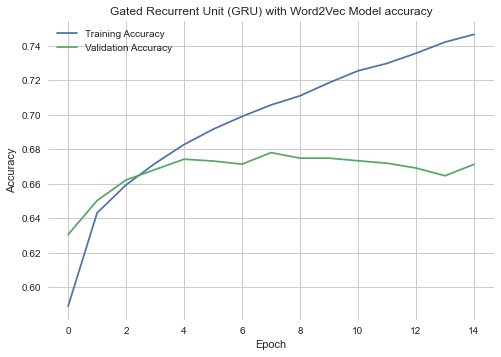

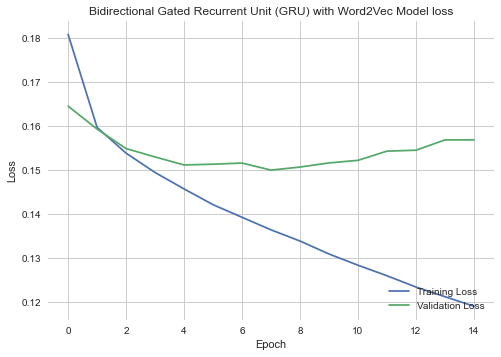

In [61]:
# Plot training & validation accuracy values
plt.plot(GRU_Word2Vec_model_fit.history['accuracy'])
plt.plot(GRU_Word2Vec_model_fit.history['val_accuracy'])
plt.title('Gated Recurrent Unit (GRU) with Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(GRU_Word2Vec_model_fit.history['loss'])
plt.plot(GRU_Word2Vec_model_fit.history['val_loss'])
plt.title('Bidirectional Gated Recurrent Unit (GRU) with Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [62]:
#6 Bidirectional Gated Recurrent (GRU) with Word2Vec
sequence_input = Input(shape=(max_len, ))
model = Embedding(input_dim =word2Vec_embedding_matrix.shape[0], input_length=max_len, output_dim=word2Vec_embedding_matrix.shape[1],weights=[word2Vec_embedding_matrix], trainable=False)(sequence_input)
model = SpatialDropout1D(0.2)(model)
model = Bidirectional(GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool]) 
preds = Dense(15, activation="sigmoid")(model)
Bil_GRU_Word2Vec_model = Model(sequence_input, preds)

In [63]:
Bil_GRU_Word2Vec_model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=['accuracy', mean_pred, fmeasure, precision, recall])


In [64]:
Bil_GRU_Word2Vec_model.summary()


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 101,626,319
Trainable params: 249,295
Non-trainable params: 101,377,024
__________________________________________________________________________________________________


In [65]:
Bil_GRU_Word2Vec_model_fit = Bil_GRU_Word2Vec_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val))


Epoch 1/15
504/504 [==============================] - 1488s 3s/step - loss: 0.1742 - accuracy: 0.6113 - mean_pred: 0.0847 - fmeasure: 0.5111 - precision: 0.7323 - recall: 0.3989 - val_loss: 0.1603 - val_accuracy: 0.6474 - val_mean_pred: 0.0824 - val_fmeasure: 0.5662 - val_precision: 0.7425 - val_recall: 0.4580
Epoch 2/15
504/504 [==============================] - 1477s 3s/step - loss: 0.1550 - accuracy: 0.6563 - mean_pred: 0.0809 - fmeasure: 0.5777 - precision: 0.7615 - recall: 0.4665 - val_loss: 0.1555 - val_accuracy: 0.6613 - val_mean_pred: 0.0813 - val_fmeasure: 0.5817 - val_precision: 0.7582 - val_recall: 0.4723
Epoch 3/15
504/504 [==============================] - 1482s 3s/step - loss: 0.1484 - accuracy: 0.6754 - mean_pred: 0.0808 - fmeasure: 0.6014 - precision: 0.7727 - recall: 0.4932 - val_loss: 0.1529 - val_accuracy: 0.6710 - val_mean_pred: 0.0787 - val_fmeasure: 0.6012 - val_precision: 0.7554 - val_recall: 0.4997
Epoch 4/15
504/504 [==============================] - 1487s 3s/s

### Plot Training & Validation Accuracy with the Loss values of the Bil GRU + Glove Model

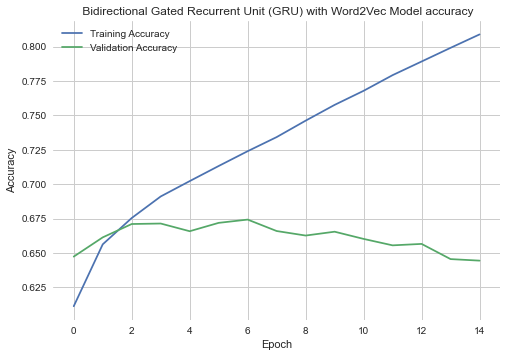

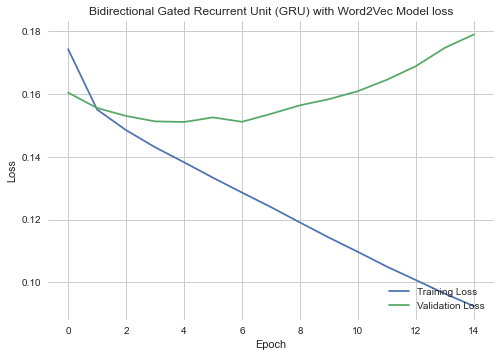

In [66]:
# Plot training & validation accuracy values
plt.plot(Bil_GRU_Word2Vec_model_fit.history['accuracy'])
plt.plot(Bil_GRU_Word2Vec_model_fit.history['val_accuracy'])
plt.title(' Bidirectional Gated Recurrent Unit (GRU) with Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_GRU_Word2Vec_model_fit.history['loss'])
plt.plot(Bil_GRU_Word2Vec_model_fit.history['val_loss'])
plt.title('Bidirectional Gated Recurrent Unit (GRU) with Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [67]:
from chart_studio import plotly
import plotly.offline as py
import plotly.graph_objs as go

# Evaluation of Experiment With GLOVE Pre-trained Embedding

#### Computing the highest of the evaluation matrics (per model) 

In [68]:
#Computing the highest of the evaluation matrics (per model)
trace = go.Table(
    header=dict(values=['Model', 'Loss', 'Accuracy', 'mean_pred', 'F-Measure', 'Precision', 'Recall'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[['CNN-Word2Vec', 'RNNs-Word2Vec', 'LSTM-Word2Vec', ' BiLSTM-Word2Vec', 'GRU-Word2Vec', 'BiGRU-Word2Vec'],
                       [
                        #Loss Evaluation
                        round(np.max(CNN_Word2Vec_model_fit.history['loss']), 3), round(np.max(RNN_Word2Vec_model_fit.history['loss']), 3), 
                        round(np.max(LSTM_Word2Vec_model_fit.history['loss']), 3), round(np.max(Bil_LSTM_Word2Vec_model_fit.history['loss']), 3), round(np.max(GRU_Word2Vec_model_fit.history['loss']), 3),
                        round(np.max(Bil_GRU_Word2Vec_model_fit.history['loss']), 3)],
                        
                        #Accuracy Evaluation
                        [round(np.max(CNN_Word2Vec_model_fit.history['accuracy']), 3), round(np.max(RNN_Word2Vec_model_fit.history['accuracy']), 3), 
                        round(np.max(LSTM_Word2Vec_model_fit.history['accuracy']), 3), round(np.max(Bil_LSTM_Word2Vec_model_fit.history['accuracy']), 3), round(np.max(GRU_Word2Vec_model_fit.history['accuracy']), 3),
                        round(np.max(Bil_GRU_Word2Vec_model_fit.history['accuracy']), 3)],
               
                        #mean_pred Evaluation
                        [round(np.max(CNN_Word2Vec_model_fit.history['mean_pred']), 3), round(np.max(RNN_Word2Vec_model_fit.history['mean_pred']), 3), 
                        round(np.max(LSTM_Word2Vec_model_fit.history['mean_pred']), 3), round(np.max(Bil_LSTM_Word2Vec_model_fit.history['mean_pred']), 3), round(np.max(GRU_Word2Vec_model_fit.history['mean_pred']), 3),
                        round(np.max(Bil_GRU_Word2Vec_model_fit.history['mean_pred']), 3)],

                        #F1-Measure Evaluation fmeasure
                        [round(np.max(CNN_Word2Vec_model_fit.history['fmeasure']), 3), round(np.max(RNN_Word2Vec_model_fit.history['fmeasure']), 3), 
                        round(np.max(LSTM_Word2Vec_model_fit.history['fmeasure']), 3), round(np.max(Bil_LSTM_Word2Vec_model_fit.history['fmeasure']), 3), round(np.max(GRU_Word2Vec_model_fit.history['fmeasure']), 3),
                        round(np.max(Bil_GRU_Word2Vec_model_fit.history['fmeasure']), 3)],
            
                        #Precision Evaluation precision
                        [round(np.max(CNN_Word2Vec_model_fit.history['precision']), 3), round(np.max(RNN_Word2Vec_model_fit.history['precision']), 3), 
                        round(np.max(LSTM_Word2Vec_model_fit.history['precision']), 3), round(np.max(Bil_LSTM_Word2Vec_model_fit.history['precision']), 3), round(np.max(GRU_Word2Vec_model_fit.history['precision']), 3),
                        round(np.max(Bil_GRU_Word2Vec_model_fit.history['precision']), 3)],
                       
                        #Recall Evaluation
                        [round(np.max(CNN_Word2Vec_model_fit.history['recall']), 3), round(np.max(RNN_Word2Vec_model_fit.history['recall']), 3), 
                        round(np.max(LSTM_Word2Vec_model_fit.history['recall']), 3), round(np.max(Bil_LSTM_Word2Vec_model_fit.history['recall']), 3), round(np.max(GRU_Word2Vec_model_fit.history['recall']), 3),
                        round(np.max(Bil_GRU_Word2Vec_model_fit.history['recall']), 3)]
                       ],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=800, height=400)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(data, filename = 'Word2Vec_trained_embedding_with the max of the evaluation matrics (per model) _table')

#### Computing the mean of the evaluation matrics (per model) 

In [69]:
#Computing the mean of the evaluation matrics (per model)
trace = go.Table(
    header=dict(values=['Model', 'Loss', 'Accuracy', 'mean_pred', 'F-Measure', 'Precision', 'Recall'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[['CNN-Word2Vec', 'RNNs-Word2Vec', 'LSTM-Word2Vec', ' BiLSTM-Word2Vec', 'GRU-Word2Vec', 'BiGRU-Word2Vec'],
                       [
                        #Loss Evaluation
                        round(np.mean(CNN_Word2Vec_model_fit.history['loss']), 3), round(np.mean(RNN_Word2Vec_model_fit.history['loss']), 3), 
                        round(np.mean(LSTM_Word2Vec_model_fit.history['loss']), 3), round(np.mean(Bil_LSTM_Word2Vec_model_fit.history['loss']), 3), round(np.mean(GRU_Word2Vec_model_fit.history['loss']), 3),
                        round(np.mean(Bil_GRU_Word2Vec_model_fit.history['loss']), 3)],
                        
                        #Accuracy Evaluation
                        [round(np.mean(CNN_Word2Vec_model_fit.history['accuracy']), 3), round(np.mean(RNN_Word2Vec_model_fit.history['accuracy']), 3), 
                        round(np.mean(LSTM_Word2Vec_model_fit.history['accuracy']), 3), round(np.mean(Bil_LSTM_Word2Vec_model_fit.history['accuracy']), 3), round(np.mean(GRU_Word2Vec_model_fit.history['accuracy']), 3),
                        round(np.mean(Bil_GRU_Word2Vec_model_fit.history['accuracy']), 3)],
               
                        #mean_pred Evaluation
                        [round(np.mean(CNN_Word2Vec_model_fit.history['mean_pred']), 3), round(np.mean(RNN_Word2Vec_model_fit.history['mean_pred']), 3), 
                        round(np.mean(LSTM_Word2Vec_model_fit.history['mean_pred']), 3), round(np.mean(Bil_LSTM_Word2Vec_model_fit.history['mean_pred']), 3), round(np.mean(GRU_Word2Vec_model_fit.history['mean_pred']), 3),
                        round(np.mean(Bil_GRU_Word2Vec_model_fit.history['mean_pred']), 3)],

                        #F1-Measure Evaluation fmeasure
                        [round(np.mean(CNN_Word2Vec_model_fit.history['fmeasure']), 3), round(np.mean(RNN_Word2Vec_model_fit.history['fmeasure']), 3), 
                        round(np.mean(LSTM_Word2Vec_model_fit.history['fmeasure']), 3), round(np.mean(Bil_LSTM_Word2Vec_model_fit.history['fmeasure']), 3), round(np.mean(GRU_Word2Vec_model_fit.history['fmeasure']), 3),
                        round(np.mean(Bil_GRU_Word2Vec_model_fit.history['fmeasure']), 3)],
          
                        #Precision Evaluation precision
                        [round(np.mean(CNN_Word2Vec_model_fit.history['precision']), 3), round(np.mean(RNN_Word2Vec_model_fit.history['precision']), 3), 
                        round(np.mean(LSTM_Word2Vec_model_fit.history['precision']), 3), round(np.mean(Bil_LSTM_Word2Vec_model_fit.history['precision']), 3), round(np.mean(GRU_Word2Vec_model_fit.history['precision']), 3),
                        round(np.mean(Bil_GRU_Word2Vec_model_fit.history['precision']), 3)],
                       
                        #Recall Evaluation
                        [round(np.mean(CNN_Word2Vec_model_fit.history['recall']), 3), round(np.mean(RNN_Word2Vec_model_fit.history['recall']), 3), 
                        round(np.mean(LSTM_Word2Vec_model_fit.history['recall']), 3), round(np.mean(Bil_LSTM_Word2Vec_model_fit.history['recall']), 3), round(np.mean(GRU_Word2Vec_model_fit.history['recall']), 3),
                        round(np.mean(Bil_GRU_Word2Vec_model_fit.history['recall']), 3)]
                       ],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=800, height=400)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(data, filename = 'Word2Vec_trained_embedding_with the Mean value of the evaluation matrics (per model) _table')

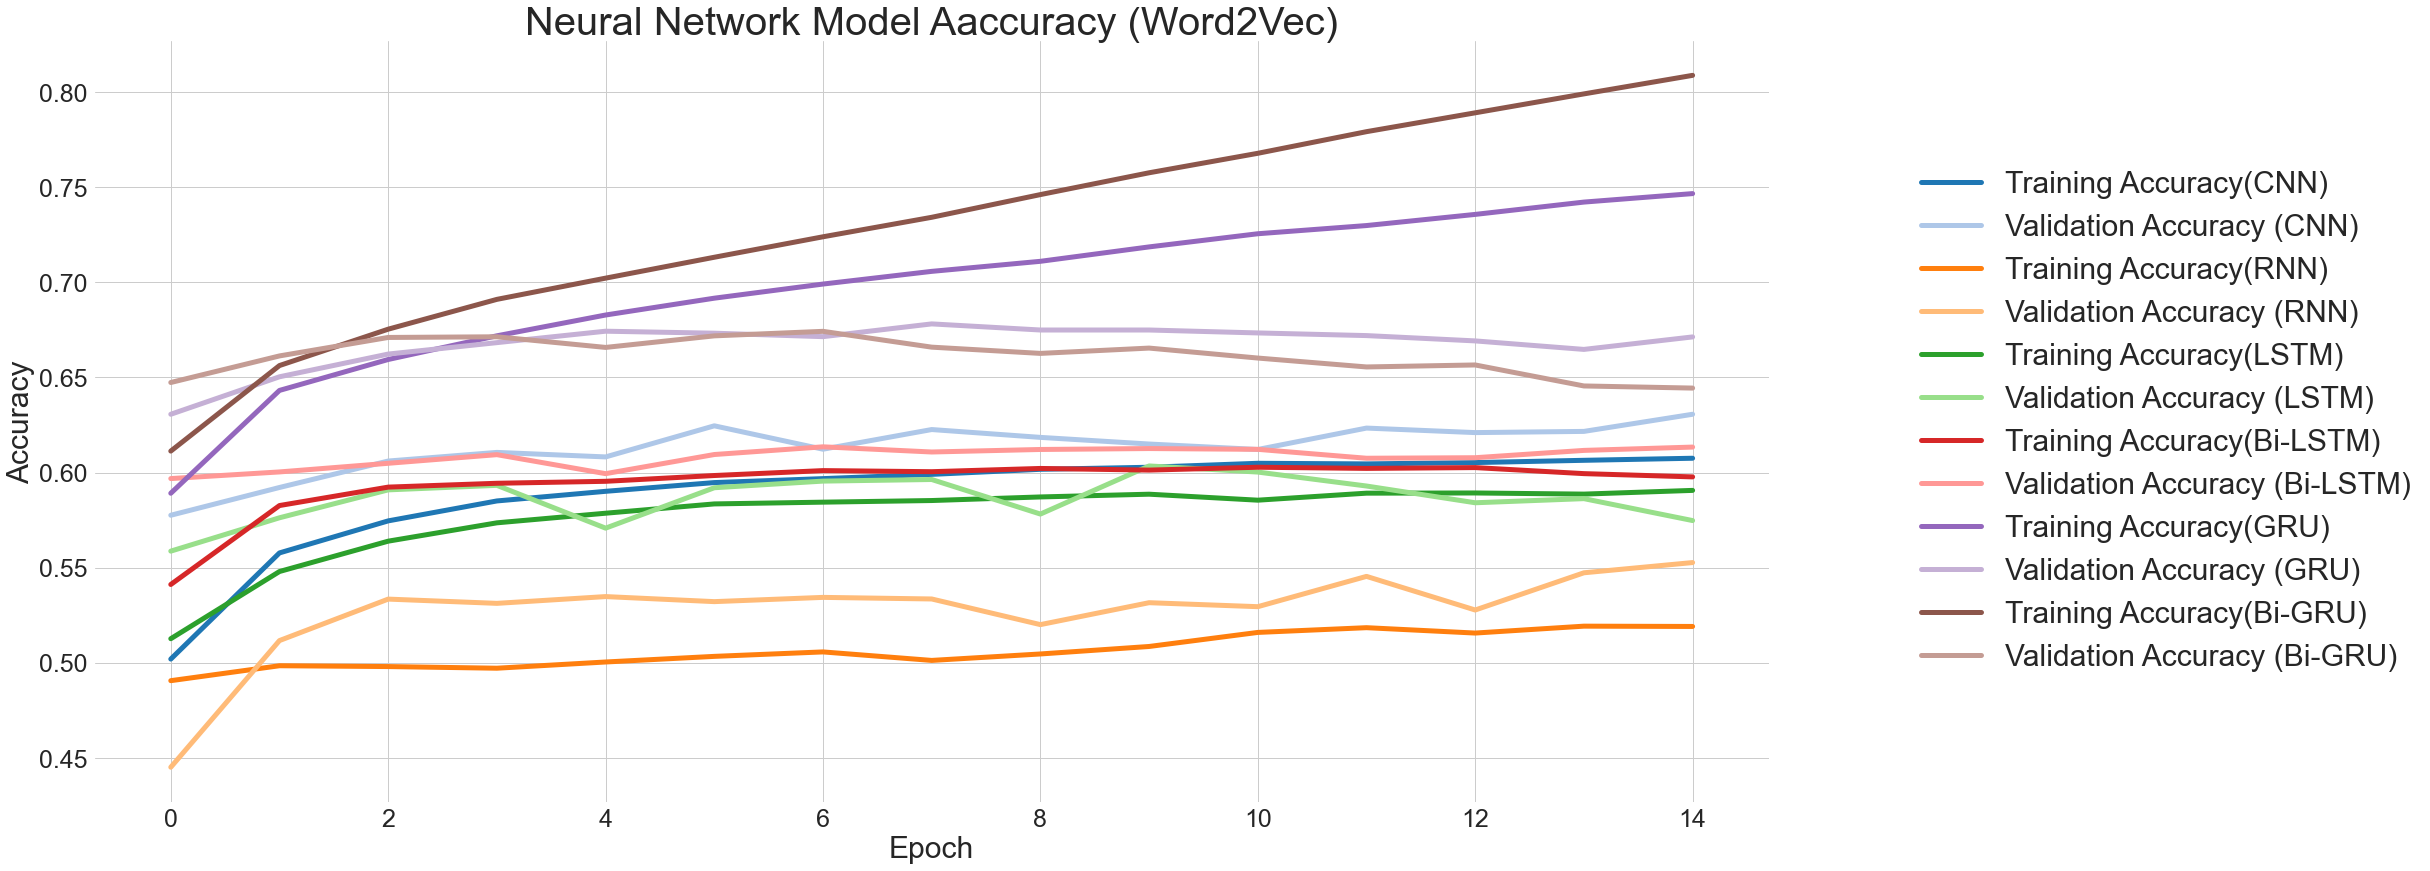

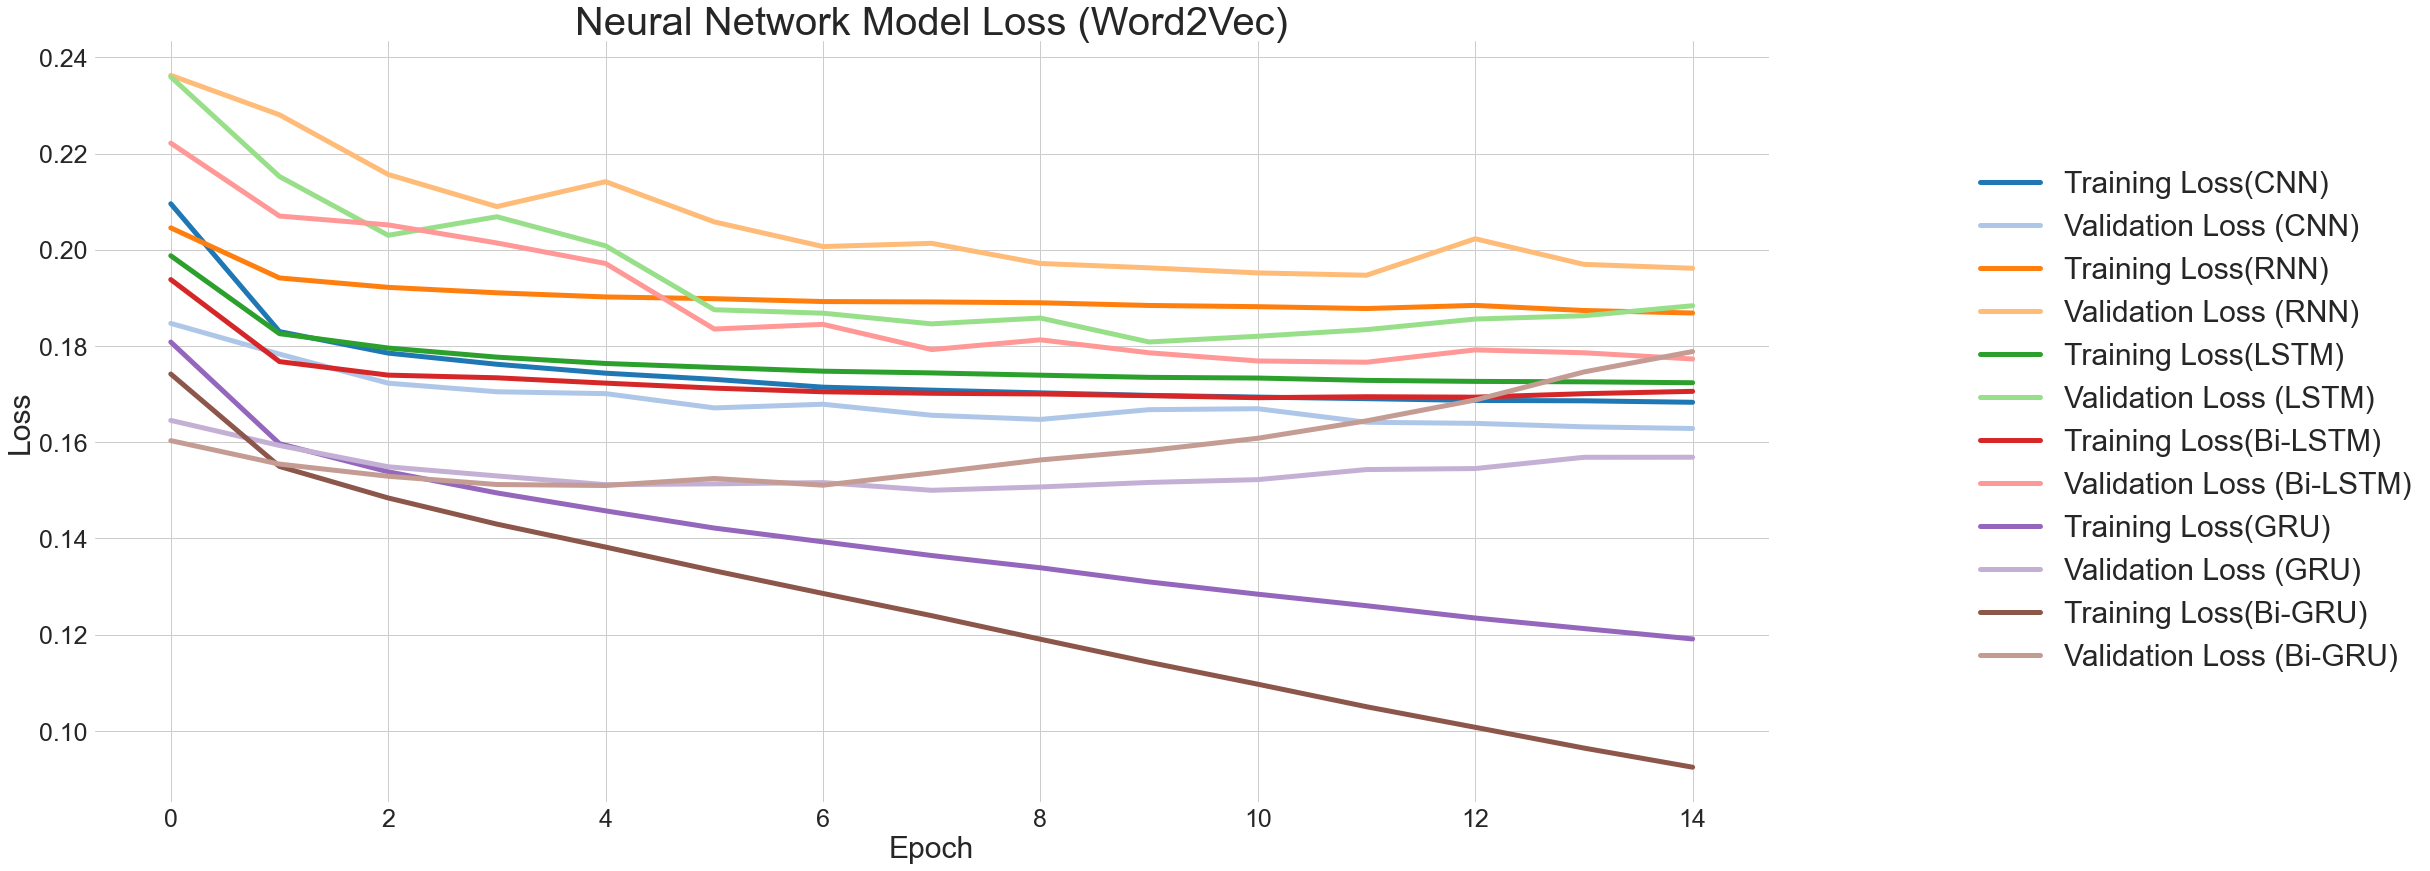

In [71]:
from matplotlib.cm import get_cmap
name = "tab20"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

plt.rc('lines', linewidth = 5)
fig, ax2 = plt.subplots(figsize=(30, 14))
ax2.set_prop_cycle(color=colors)
ax2.tick_params(axis='x', labelsize=25)
ax2.tick_params(axis='y', labelsize=25)

# Plot training & validation accuracy values

plt.plot(CNN_Word2Vec_model_fit.history['accuracy'])
plt.plot(CNN_Word2Vec_model_fit.history['val_accuracy'])
plt.plot(RNN_Word2Vec_model_fit.history['accuracy'])
plt.plot(RNN_Word2Vec_model_fit.history['val_accuracy'])

plt.plot(LSTM_Word2Vec_model_fit.history['accuracy'])
plt.plot(LSTM_Word2Vec_model_fit.history['val_accuracy'])
plt.plot(Bil_LSTM_Word2Vec_model_fit.history['accuracy'])
plt.plot(Bil_LSTM_Word2Vec_model_fit.history['val_accuracy'])

plt.plot(GRU_Word2Vec_model_fit.history['accuracy'])
plt.plot(GRU_Word2Vec_model_fit.history['val_accuracy'])
plt.plot(Bil_GRU_Word2Vec_model_fit.history['accuracy'])
plt.plot(Bil_GRU_Word2Vec_model_fit.history['val_accuracy'])
plt.title('Neural Network Model Aaccuracy (Word2Vec)', fontsize=40)
plt.ylabel('Accuracy', fontsize=30)
plt.xlabel('Epoch', fontsize=30)
plt.legend(['Training Accuracy(CNN)', 'Validation Accuracy (CNN)',
           'Training Accuracy(RNN)', 'Validation Accuracy (RNN)',
           'Training Accuracy(LSTM)', 'Validation Accuracy (LSTM)',
           'Training Accuracy(Bi-LSTM)', 'Validation Accuracy (Bi-LSTM)',
           'Training Accuracy(GRU)', 'Validation Accuracy (GRU)',
           'Training Accuracy(Bi-GRU)', 'Validation Accuracy (Bi-GRU)'], loc='right', bbox_to_anchor=(1.4, .5), fontsize=30)

plt.show()


plt.rc('lines', linewidth = 5)
fig, ax2 = plt.subplots(figsize=(30, 14))
ax2.set_prop_cycle(color=colors)
ax2.tick_params(axis='x', labelsize=25)
ax2.tick_params(axis='y', labelsize=25)

# Plot training & validation loss values
plt.plot(CNN_Word2Vec_model_fit.history['loss'])
plt.plot(CNN_Word2Vec_model_fit.history['val_loss'])
plt.plot(RNN_Word2Vec_model_fit.history['loss'])
plt.plot(RNN_Word2Vec_model_fit.history['val_loss'])

plt.plot(LSTM_Word2Vec_model_fit.history['loss'])
plt.plot(LSTM_Word2Vec_model_fit.history['val_loss'])
plt.plot(Bil_LSTM_Word2Vec_model_fit.history['loss'])
plt.plot(Bil_LSTM_Word2Vec_model_fit.history['val_loss'])

plt.plot(GRU_Word2Vec_model_fit.history['loss'])
plt.plot(GRU_Word2Vec_model_fit.history['val_loss'])
plt.plot(Bil_GRU_Word2Vec_model_fit.history['loss'])
plt.plot(Bil_GRU_Word2Vec_model_fit.history['val_loss'])
plt.title('Neural Network Model Loss (Word2Vec)', fontsize=40)
plt.ylabel('Loss', fontsize=30)
plt.xlabel('Epoch', fontsize=30)
plt.legend(['Training Loss(CNN)', 'Validation Loss (CNN)',
           'Training Loss(RNN)', 'Validation Loss (RNN)',
           'Training Loss(LSTM)', 'Validation Loss (LSTM)',
           'Training Loss(Bi-LSTM)', 'Validation Loss (Bi-LSTM)',
           'Training Loss(GRU)', 'Validation Loss (GRU)',
           'Training Loss(Bi-GRU)', 'Validation Loss (Bi-GRU)'], loc='right', bbox_to_anchor=(1.4, .5), fontsize=30)
plt.show()